In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
!unzip /content/drive/MyDrive/FYP/chest_xray_VGG16_Original_Data>.zip -d /content/extracted_files

In [ ]:
# Define dataset paths
base_dir = '/content/extracted_files/chest_xray_VGG16_Original_Data'  # Adjust this path as needed
train_dir = os.path.join(base_dir, '/content/extracted_files/chest_xray_VGG16_Original_Data/train')
test_dir = os.path.join(base_dir, '/content/extracted_files/chest_xray_VGG16_Original_Data/test')


In [ ]:
# Define data generators without augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


In [ ]:
# Create training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 4187 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1045 images belonging to 2 classes.


In [ ]:
# Create test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [ ]:
print("Training set class distribution:", train_generator.classes.sum())
print("Validation set class distribution:", validation_generator.classes.sum())
print("Test set class distribution:", test_generator.classes.sum())

Training set class distribution: 3107
Validation set class distribution: 776
Test set class distribution: 390


In [ ]:
# Load VGG16 without the top layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze the convolutional base
for layer in vgg_base.layers:
    layer.trainable = False


In [ ]:
# Build the full model
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust epochs as needed
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 3469s 26s/step - accuracy: 0.8076 - loss: 0.6344 - val_accuracy: 0.9254 - val_loss: 0.1930
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3454s 26s/step - accuracy: 0.9384 - loss: 0.1728 - val_accuracy: 0.9598 - val_loss: 0.1081
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3415s 26s/step - accuracy: 0.9654 - loss: 0.1237 - val_accuracy: 0.9780 - val_loss: 0.0637
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3464s 26s/step - accuracy: 0.9662 - loss: 0.1008 - val_accuracy: 0.9780 - val_loss: 0.0551
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3419s 26s/step - accuracy: 0.9748 - loss: 0.0923 - val_accuracy: 0.9770 - val_loss: 0.0518
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3444s 26s/step - accuracy: 0.9689 - loss: 0.0894 - val_accuracy: 0.9818 - val_loss: 0.0480
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3419s 26s/step - accuracy: 0.9782 - loss: 0.0870 - val_accuracy: 0.9828 - val_loss: 0.0448
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3424s 26s/step - accuracy: 0.9700 - loss: 0.0832 - val

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 406s 20s/step - accuracy: 0.5926 - loss: 2.0927
Test Accuracy: 77.40%


In [ ]:
# Predict classes on test data
predictions = (model.predict(test_generator) > 0.5).astype("int32")


20/20 ━━━━━━━━━━━━━━━━━━━━ 406s 20s/step


In [ ]:
# Generate Confusion Matrix and Classification Report
print("Confusion Matrix")
print(confusion_matrix(test_generator.classes, predictions))


Confusion Matrix
[[ 95 139]
 [  2 388]]


In [ ]:
print("Classification Report")
print(classification_report(test_generator.classes, predictions, target_names=test_generator.class_indices.keys()))


Classification Report
              precision    recall  f1-score   support

      NORMAL       0.98      0.41      0.57       234
   PNEUMONIA       0.74      0.99      0.85       390

    accuracy                           0.77       624
   macro avg       0.86      0.70      0.71       624
weighted avg       0.83      0.77      0.74       624



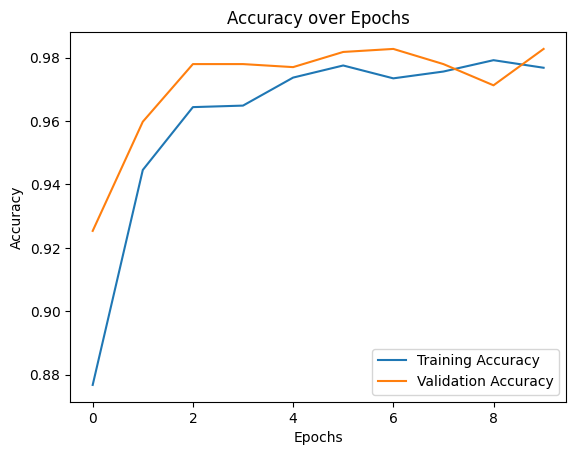

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


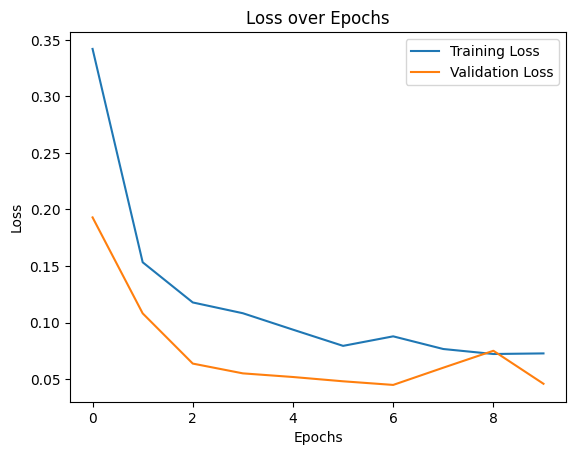

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()